## Multivariate Linear Regression

In this dataset we will apply multivariate linear regression in order to determine the relationship between GRE Score, TOEFL Score and GPA. We will see how much of GPA's (dependent variable) variance is explained by GRE and TOEFL scores (independent variables).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
data = pd.read_csv('./demo-datasets/admissions.csv', index_col=0)

In [3]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


- __GRE Score__ - GRE Scores (max 340)
- __TOEFL Score__ - TOEFL Scores (max 120)
- __University Rating__ - Rating of a university (max 5)
- __SOP__ - Statement of purpose strength (max 5)
- __LOR__ - Letter of Recommendation strength (max 5)
- __CGPA__ - Undergraduate GPA (max 10)
- __Research Experience__ - Has experience (1), does not have experience (0)
- __Chance of Admit__ - Probability of being admitted to a university

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


In [5]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

Notice that some of the columns have whitespace at the end of their names. Let's remove whitespace from every column name.

In [6]:
data.columns = [x.strip() for x in data.columns]
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

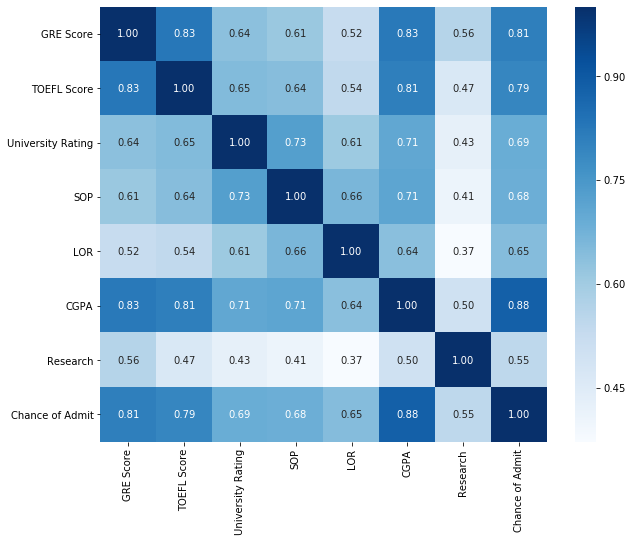

In [7]:
# plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='Blues')

__Observation 1__: GPA has high positive correlation with both GRE and TOEFL scores, 0.83 and 0.81 respectively. 

__Observation 2__: GRE and TOEFL scores are also highly correlated. Correlation is 0.83 which is probably not surprising. If a person does very well on one exam, it is higly likely that the person will do well in another exam. The following chart demonstrates this hypothesis.

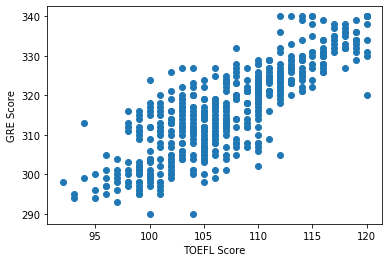

In [8]:
plt.scatter(data['TOEFL Score'], data['GRE Score'])
plt.xlabel('TOEFL Score')
plt.ylabel('GRE Score')
plt.show()

## Multicollinearity

Since TOEFL and GRE scores are highly correlated, we would introduce a degree of __multicollinearity__ into our regression if both of variables were used as predictors.

In statistics, __multicollinearity__ (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. A multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.

Another indicator that multicollinearity may be present in a model is large changes in the estimated regression coefficients when a new independent variable is added or deleted.

## How to deal with Multicollinearity

Multicollinearity does not reduce the ability of the model to be predictive. You may still do a good job predicting your target variable in the presence of multicollinearity. It does, however, affect the quality of the interpretation of the individual predictors. In other words, in the presence of multicollinearity you may not have reliable results about any individual $w$ coefficient.

Some ways to deal with multicollinearity are:
1. Remove some of the highly correlated independent variables.
2. Linearly combine the independent variables, such as adding them together.
3. Perform an analysis designed for highly correlated variables, such as principal components analysis or partial least squares regression.

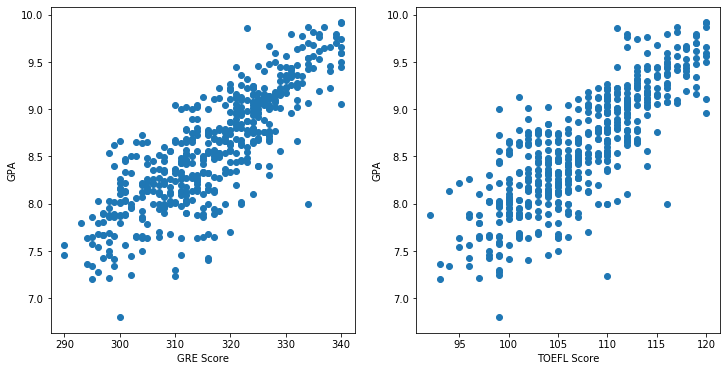

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter('GRE Score', 'CGPA', data=data)
plt.xlabel('GRE Score')
plt.ylabel('GPA')

plt.subplot(122)
plt.scatter('TOEFL Score', 'CGPA', data=data)
plt.xlabel('TOEFL Score')
plt.ylabel('GPA')

plt.show()

First, let's do a regression with just one independent variable, __GRE Score__.

In [9]:
lr = LinearRegression()

In [10]:
x = data['GRE Score'].values.reshape(-1, 1)

In [11]:
y = data['CGPA'].values.reshape(-1, 1)

In [12]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print('Intercept:\t{0}'.format(round(lr.intercept_[0], 4)))
print('Slope:\t\t{0}'.format(round(lr.coef_[0][0], 4)))
print('R-squared:\t{0}'.format(round(lr.score(x, y), 4)))

Intercept:	-5.4188
Slope:		0.0442
R-squared:	0.6821


## $R^2$-adjusted

The $R^2_{adj}$ tells you the percentage of variation explained by only the independent variables that actually affect the dependent variable. One major difference between $R^2$ and the $R^2_{adj}$ is that $R^2$ supposes that every independent variable in the model explains the variation in the dependent variable.

The $R^2_{adj}$ can be negative, and its value will always be less than or equal to that of $R^2$. Unlike $R^2$, the $R^2_{adj}$ increases only when the increase in $R^2$ (due to the inclusion of a new explanatory variable) is more than one would expect to see by chance.

$$R^2_{adj}=1-\frac{(1-R^2)\times(n-1)}{n-k-1}$$

In [2]:
def calc_r2_adj(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [15]:
print('R-squared adjusted: {0}'.format(round(calc_r2_adj(lr.score(x, y), len(x), 1), 3)))

R-squared adjusted: 0.681


### Linear Regression with _StatsModels_ library
Let's do the same linear regression using _statsmodels_ library. _statsmodels_ library allows to print detailed results of a regression, which unfortunately you cannot do by using _scikit-learn_ library.

In [17]:
x2 = x.copy()
y2 = y.copy()

In [18]:
# an intercept is not included by default and has to be added manually
x2 = sm.add_constant(x2)

In [19]:
results = sm.OLS(y2, x2).fit()

In [20]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     1068.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):          5.19e-126
Time:                        23:30:34   Log-Likelihood:                -171.07
No. Observations:                 500   AIC:                             346.1
Df Residuals:                     498   BIC:                             354.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4188      0.428    -12.648      0.0

Text(0, 0.5, 'GPA')

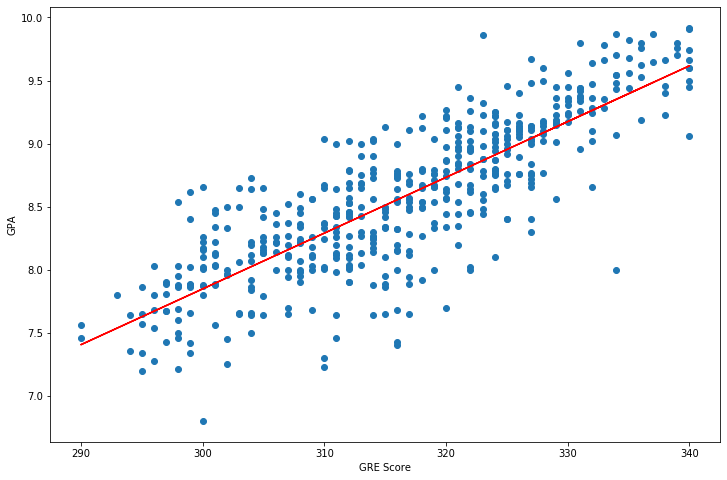

In [21]:
plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.plot(x, lr.predict(x), color='red')
plt.xlabel('GRE Score')
plt.ylabel('GPA')

_GRE Score_ explains 68.1% of the variance of _CGPA_. Our hypothesis now is that by adding _TOEFL Score_ to the regression, we should improve coefficient of determination.

In [22]:
x = data[['GRE Score', 'TOEFL Score']]

In [24]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lr.coef_[0][1]

0.040128068343726925

In [26]:
print('Intercept:\t\t{0}'.format(round(lr.intercept_[0], 4)))
print('GRE Score coef:\t\t{0}'.format(round(lr.coef_[0][0], 4)))
print('TOEFL Score coef:\t{0}'.format(round(lr.coef_[0][1], 4)))
print('R-squared:\t\t{0}'.format(round(lr.score(x, y), 4)))
print('R-squared adjusted:\t{0}'.format(round(calc_r2_adj(lr.score(x, y), len(x), 2), 3)))

Intercept:		-4.0638
GRE Score coef:		0.0263
TOEFL Score coef:	0.0401
R-squared:		0.7335
R-squared adjusted:	0.732


Both $R^2$ and $R^2_{adj}$ have improved. The fact that $R^2_{adj}$ has increased means that adding _TOEFL Score_ to the regression model did improve its prediction accuracy.

$CGPA=-4.064+0.02635*{GRE Score}+0.0402*{TOEFL Score}$

Now let's do the same regression with _statsmodels_ library.

In [27]:
x2 = data[['GRE Score', 'TOEFL Score']]
y2 = y.copy()

In [28]:
x2 = sm.add_constant(x2)

c:\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [29]:
results = sm.OLS(y2, x2).fit()

In [30]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     683.9
Date:                Wed, 27 Nov 2019   Prob (F-statistic):          1.96e-143
Time:                        23:30:58   Log-Likelihood:                -126.97
No. Observations:                 500   AIC:                             259.9
Df Residuals:                     497   BIC:                             272.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.0638      0.416     -9.761      

Now let's see what happens to the model if we add an additional independent variable that has no relationship with GPA score. We will add _Research_ variable to our model.

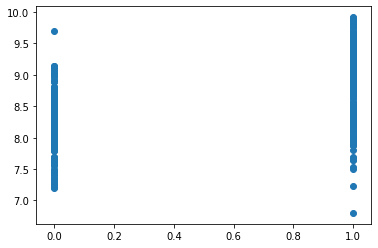

In [31]:
plt.scatter(data['Research'], data['CGPA'])

In [32]:
x = data[['GRE Score', 'TOEFL Score', 'Research']]
y = data['CGPA'].values.reshape(-1, 1)

In [33]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print('Intercept:\t\t{0}'.format(round(lr.intercept_[0], 4)))
print('GRE Score coef:\t\t{0}'.format(round(lr.coef_[0][0], 4)))
print('TOEFL Score coef:\t{0}'.format(round(lr.coef_[0][1], 4)))
print('Research coef:\t\t{0}'.format(round(lr.coef_[0][2], 4)))
print('R-squared:\t\t{0}'.format(round(lr.score(x, y), 4)))
print('R-squared adjusted:\t{0}'.format(round(calc_r2_adj(lr.score(x, y), len(x), 2), 3)))

Intercept:		-3.6017
GRE Score coef:		0.0248
TOEFL Score coef:	0.0401
Research coef:		0.0635
R-squared:		0.7353
R-squared adjusted:	0.734


In [35]:
x2 = data[['GRE Score', 'TOEFL Score', 'Research']]
y2 = y.copy()

In [36]:
x2 = sm.add_constant(x2)

c:\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [37]:
results = sm.OLS(y2, x2).fit()

In [38]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     459.4
Date:                Wed, 27 Nov 2019   Prob (F-statistic):          1.02e-142
Time:                        23:30:58   Log-Likelihood:                -125.22
No. Observations:                 500   AIC:                             258.4
Df Residuals:                     496   BIC:                             275.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.6017      0.484     -7.449      

In [18]:
data['CombinedScore'] = data['GRE Score'] / 340 + data['TOEFL Score'] / 120

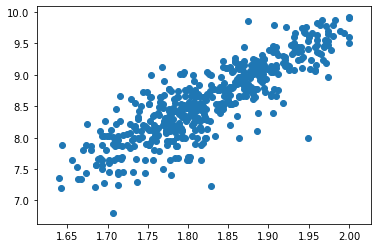

In [19]:
plt.scatter(data['CombinedScore'], data['CGPA'])

In [23]:
x3 = data['CombinedScore'].values.reshape(-1, 1)
y3 = data['CGPA']